# Drug Nomenclature

    T0: First timepoint 
    (Time Zero, after selection of cells with sgRNA library, and starting point of drug dosing)
    DMSO: DMSO treated 
    Pi: PARP inhibitor (olaparib; AZD2281)
    Ri: ATR inhibitor (AZD6738)
    Wi: WEE1 inhibitor (AZD1775)
    Mi: ATM inhibitor (AZD0156)
    Ki: DNAPK inhibitor (AZD7648)


    PiRi: PARP inhibitor + ATR inhibitor
    PiWi: PARP inhibitor + WEE1 inhibitor
    PiMi: PARP inhibitor + ATM inhibitor
    PiKi: PARP inhibitor + DNAPK inhibitor

# Load data

In [79]:
import sys
import pandas as pd
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from venn import venn 
from upsetplot import from_contents,UpSet
from matplotlib.backends.backend_pdf import PdfPages
import stringdb

# sys.path.append("/rumi/shams/abe/Projects/ScreenProcessing/")
sys.path.append("/data_gilbert/home/aarab/ScreenProcessing")

import screen_analysis as scpro
from utils import *

In [80]:
# help(scpro)

In [81]:
Ci = scpro.loadData('CRISPRi/Analysis/PiKiMiRiWi/PiKiMiRiWi_2reps')

Ca_k562 = scpro.loadData('CRISPRa/Analysis/k562/k562a_PiRi')
Ca_A549 = scpro.loadData('CRISPRa/Analysis/single_replicate_A549/PiRiWi_1stRep/CRISPRa_PiWiRi')

## CRISPRi Analysis
        gamma:T0:DMSO
        rho1:DMSO:Pi
        rho2:DMSO:Ki
        rho3:DMSO:Mi
        rho4:DMSO:Ri
        rho5:DMSO:Wi
        rho6:DMSO:PiKi
        rho7:DMSO:PiMi
        rho8:DMSO:PiRi
        rho9:DMSO:PiWi



In [82]:
# {score for score,_,_ in Ci['gene scores'].columns.tolist()}

In [83]:
Ci_data = {
    'Pi':{'rho':  get_score(Ci,'rho1','Pi')},
    'Ki':{'rho':  get_score(Ci,'rho2','Ki')},
    'Mi':{'rho':  get_score(Ci,'rho3','Mi')},
    'Ri':{'rho':  get_score(Ci,'rho4','Ri')},
    'Wi':{'rho':  get_score(Ci,'rho5','Wi')},
    'PiKi':{'rho':  get_score(Ci,'rho6','PiKi')},
    'PiMi':{'rho':  get_score(Ci,'rho7','PiMi')},
    'PiRi':{'rho':  get_score(Ci,'rho8','PiRi')},
    'PiWi':{'rho':  get_score(Ci,'rho9','PiWi')}
}

Pi ->
	mean(neg control gRNAs rho score): -0.0001401984993996408
	std(neg control gRNAs rho score): 0.12540825080834397
Ki ->
	mean(neg control gRNAs rho score): -0.0005673308068281182
	std(neg control gRNAs rho score): 0.16614558840684682
Mi ->
	mean(neg control gRNAs rho score): 0.0017851335633094487
	std(neg control gRNAs rho score): 0.14801638476027543
Ri ->
	mean(neg control gRNAs rho score): 0.0010093567889871565
	std(neg control gRNAs rho score): 0.1327425021656452
Wi ->
	mean(neg control gRNAs rho score): 0.0022317642323502387
	std(neg control gRNAs rho score): 0.1487822724803441
PiKi ->
	mean(neg control gRNAs rho score): -0.0033752033251339595
	std(neg control gRNAs rho score): 0.17291015247254843
PiMi ->
	mean(neg control gRNAs rho score): -0.004468641076695257
	std(neg control gRNAs rho score): 0.16403386577453327
PiRi ->
	mean(neg control gRNAs rho score): -0.00398767757688899
	std(neg control gRNAs rho score): 0.15472963895091643
PiWi ->
	mean(neg control gRNAs rho score)

## CRISPRa Analysis
### A549 cell line 
    1 replicate for all conditions
    PiRiWi_1stRep

    Phenotypes Reported as Log2(Fold Change)

    T0 = T0 
    DMSO = DMSO 
    Pi = Parpi 
    Ri = ATRi
    Wi = Wee1i 
    PiWi = Parpi/Wee1i combo 
    PiRi = Parpi/ATRi combo 

    Gamma:T0|DMSO
    Tau1:T0|Pi
    Tau2:T0|Wi
    Tau3:T0|Ri
    Tau4:T0|PiRi
    Tau5:T0|PiWi
    Rho1:DMSO|Pi
    Rho2:DMSO|Ri
    Rho3:DMSO|Wi
    Rho4:DMSO|PiRi
    Rho5:DMSO|PiWi

In [84]:
# {score for score,_,_ in Ca_k562['gene scores'].columns.tolist()}

In [85]:
# {score for score,_,_ in Ca_A549['gene scores'].columns.tolist()}

In [86]:
# Ca_data = {
#     'Pi':{'rho':  get_score(Ca_A549,'rho1','Pi',rep='Rep1')},
#     'Ri':{'rho':  get_score(Ca_A549,'rho2','Ri',rep='Rep1')},
#     'Wi':{'rho':  get_score(Ca_A549,'rho3','Wi',rep='Rep1')},
#     'PiRi':{'rho':  get_score(Ca_A549,'rho4','PiRi',rep='Rep1')},
#     'PiWi':{'rho':  get_score(Ca_A549,'rho5','PiWi',rep='Rep1')}
# }

___
# Data normalization 

Tom's suggestion - https://www.nature.com/articles/s41586-020-2099-x#Sec11

https://github.com/biohank/CRISPR_screen_analysis

> ### Calculation of growth and drug resistance phenotypes

> Calculate sgRNAs Effect sizes - ScreenProcessing

> In brief, log2 fold enrichments of sgRNAs were first measured between two samples. For any given phenotype, a median log2 fold enrichment of all negative control sgRNAs (non-targeting and safe sgRNAs) was measured and this median value was subtracted from log2 fold enrichments of all sgRNAs to account for systematic bias in screens. Lastly, log2 fold enrichments of all sgRNAs were divided by the standard deviation of negative control sgRNAs to yield phenotype Z scores ($pZ$) of sgRNAs which we used as effect size of sgRNAs. Effect size of a gene is the median value of all sgRNAs that target the gene. We used modified t-value scores as our phenotype scores for genes, which account for both consistency and strength of all sgRNA effects for given genes.

> Our phenotype scores based on t-value scores were computed as: $$
\text{phenotype score (T-score)}=\frac{(U_{gene} − U_{ctrl})}{\sqrt[2]{\frac{S_{var}}{N_{exp}} + \frac{S_{var}}{N_{ctrl}}}}$$
where $U_{gene}$ is the median effect of all sgRNAs ($pZ$) for a given gene, $U_{ctrl}$ is the median effect of all negative control sgRNAs ($pZ$), and $S_{var}$ is $Var_{gene} × (N_{exp} − 1) + Var_{ctrl} × (N_{ctrl} − 1)$, where $Var_{gene}$ is the variance of sgRNA effects ($pZ$) for a given gene, $N_{exp}$ is the number of sgRNAS for a given gene and $N_{ctrl}$ is the average number of sgRNAs per gene in a given screen.

> To combine data from two experimental replicates, normalized $pZ$ scores of sgRNAs from two replicates were pooled together and gene effects and phenotype scores were calculated from the pooled sgRNAs as described above.

Becky's suggestion
> A comparison of normalization methods for high density oligonucleotide array data based on variance and bias
https://pubmed.ncbi.nlm.nih.gov/12538238/

    library('preprocessCore')
    qdat=normalize.quantiles(matdat)
    


### z-score

https://www.statology.org/z-score-python/

In [87]:
Ci_df = pd.concat([Ci_data[drug]['rho'] for drug in Ci_data.keys()],axis=1).add_prefix('Ci.')
Ci_df_rho = Ci_df.filter(regex='rho$', axis=1)
Ci_df_rho_norm = Ci_df.filter(regex='rho.norm$', axis=1)
Ci_df_rho_norm.columns = Ci_df_rho.columns

# Ca_df = pd.concat([Ca_data[drug]['rho'] for drug in Ca_data.keys()],axis=1).add_prefix('Ca.')
# Ca_df_rho = Ca_df.filter(regex='rho$', axis=1)
# Ca_df_rho_norm = stats.zscore(Ca_df_rho,axis=1,ddof=1)

# df = pd.concat([Ci_df,Ca_df],axis=1).dropna()
# df_rho = df.filter(regex='rho$', axis=1)
# df_rho_norm = stats.zscore(df_rho,axis=1,ddof=1)

Get PPI genes 

In [88]:
# genes = ['PRDX1']
# string_ids = stringdb.get_string_ids(genes)
# enrichment_df = stringdb.get_enrichment(string_ids.queryItem)

In [89]:
# ppi = stringdb.get_interaction_partners(
#     string_ids.queryItem
# ).sort_values('score',ascending=False).preferredName_B.to_list()

# ppi = set(Ci_df.dropna().index.to_list()).intersection(set(ppi))

# go = set([gene for i in range(30) for gene in enrichment_df.loc[i,'inputGenes'].split(',')])

# Plots

In [90]:
!mkdir -p figures

### Correlation Heatmaps with Hierarchical Clustering

https://www.kaggle.com/sgalella/correlation-heatmaps-with-hierarchical-clustering

In [95]:
# sns.set_theme(style="white")

# fig_c,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))

# plot_corr(df_rho,ax1,vmin=-0.1,vmax=1)
# 'Actual rho scores'
# plot_corr(df_rho_norm,ax2,vmin=-0.1,vmax=1)
# 'z-score normalized'

# plt.savefig('figures/rho_zscore_corr.pdf')
# plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


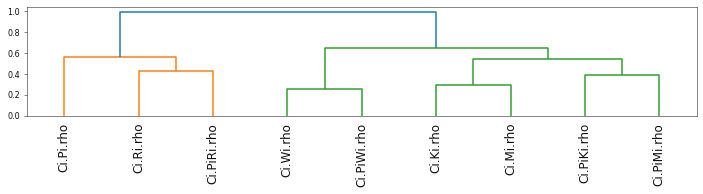

In [96]:
Z = corr_clust(Ci_df_rho, dendrogram=True)

plt.figure(figsize=(12,2))
dendrogram(Z, labels=Ci_df_rho.columns, orientation='top', 
           leaf_rotation=90);
plt.show()

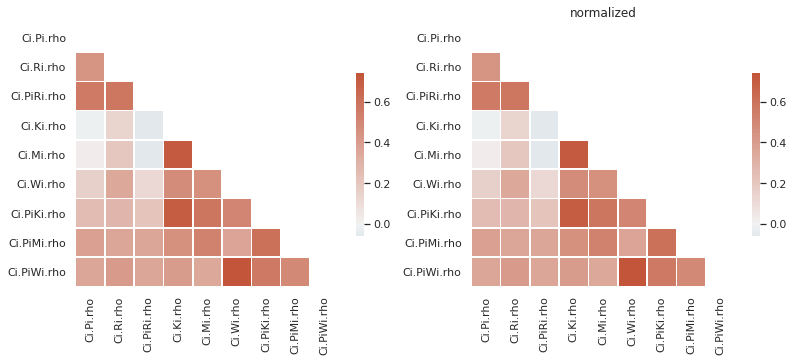

In [97]:
sns.set_theme(style="white")

fig_c,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))

plot_corr(Ci_df_rho,ax1)#,vmin=0,vmax=0.5)
ax1.set_title('')
plot_corr(Ci_df_rho_norm,ax2)#,vmin=0,vmax=0.1)
ax2.set_title('normalized')

plt.savefig('figures/rho_zscore_corr.pdf')
plt.show()


# sns.set_theme(style="white")
# plt.figure(figsize=(15,10))
# correlations = clustered.corr()
# sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
#             annot_kws={"size": 7}, vmin=-1, vmax=1);

# fig_c,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))
# f,ax1 = plt.subplots(1,1, gridspec_kw={'width_ratios':[0.1]}, figsize=(13,6))
# plot_corr(Ci_df_rho,ax=ax1)#,vmin=-0.1,vmax=1)
# ax1.set_title('normalized')

# # plt.savefig('figures/rho_zscore_corr.pdf')
# plt.show()

#### Histogram 

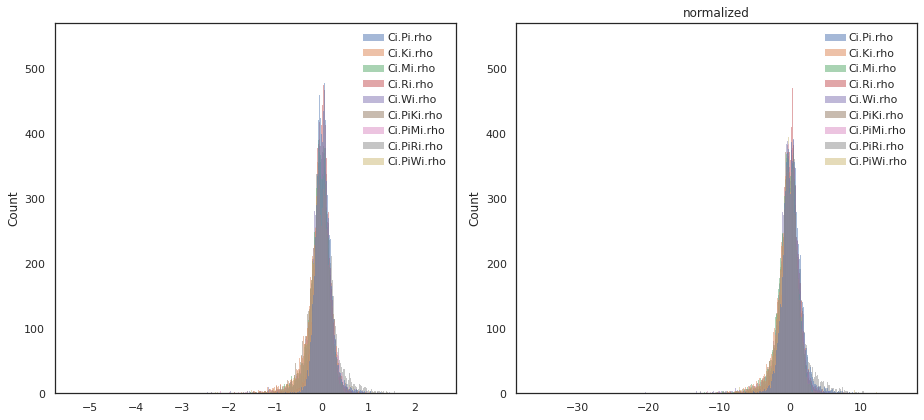

In [98]:
# plot 
fig_h,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))

al = 0.5

ax1.get_shared_y_axes().join(ax1,ax2)

h1 = sns.histplot(Ci_df_rho,alpha = al,ax=ax1)
h1.set_title('')

h2 = sns.histplot(Ci_df_rho_norm,alpha = al,ax=ax2)
h2.set_title('normalized')

fig_h.tight_layout()
plt.savefig('figures/rho_zscore_histogram.pdf')
plt.show()

<!-- Becky: -->
Scatter plot between normalized and not normalized ...

# Intersectional analysis 

In [205]:
data = pd.concat([Ci_df_rho_norm, Ci_df.filter(regex='pvalue$', axis=1)],axis=1).sort_index(axis=1)
data

for screen in Ci_data.keys():
    print (screen)
    up,dn = find_top(data.filter(regex=f'Ci.{screen}*',axis=1),f'Ci.{screen}.rho',5,f'Ci.{screen}.pvalue',0.01)
    Ci_data[screen]['up'] = up.index.to_list()
    Ci_data[screen]['dn'] = dn.index.to_list()
    print ('_'*8)

Pi
up:  115
down: 26
________
Ki
up:  12
down: 249
________
Mi
up:  3
down: 175
________
Ri
up:  9
down: 78
________
Wi
up:  39
down: 253
________
PiKi
up:  18
down: 184
________
PiMi
up:  37
down: 158
________
PiRi
up:  299
down: 97
________
PiWi
up:  105
down: 203
________


In [206]:
# for screen in Ca_data.keys():
#     print (screen)
#     up,dn = find_top(df.filter(regex=f'{screen}*',axis=1),f'Ca.{screen}.rho',0.3,f'Ca.{screen}.pvalue',0.01)
#     Ca_data[screen]['up'] = up.index.to_list()
#     Ca_data[screen]['dn'] = dn.index.to_list()
#     print ('_'*8)

## CRISPRi UpSet.plot

In [207]:
def Ci_make_two_upsetplot(UpSetData_up,UpSetData_dn,name):
    # The PDF document
    pdf_pages = PdfPages(f'figures/{name}.pdf')


    fig_u1 = plt.figure(figsize=(5, 5), dpi=300)
    fig_u2 = plt.figure(figsize=(5, 5), dpi=300)

    u1 = UpSet(
        UpSetData_up, subset_size='count',
    #     orientation='vertiCil',
        show_counts='%d',
        min_degree=2
    ).plot(fig = fig_u1)
    fig_u1.suptitle('CRISPRi rho up (Z-Score normalized)\nResistance')
    pdf_pages.savefig(fig_u1)

    u2 = UpSet(
        UpSetData_dn, subset_size='count',
    #     orientation='vertiCil',
        show_counts='%d',
        min_degree=2
    ).plot(fig = fig_u2)
    fig_u2.suptitle('CRISPRi rho down (Z-Score normalized)\nSensitivity')
    pdf_pages.savefig(fig_u2)

    # Write the PDF document to the disk
    pdf_pages.close()

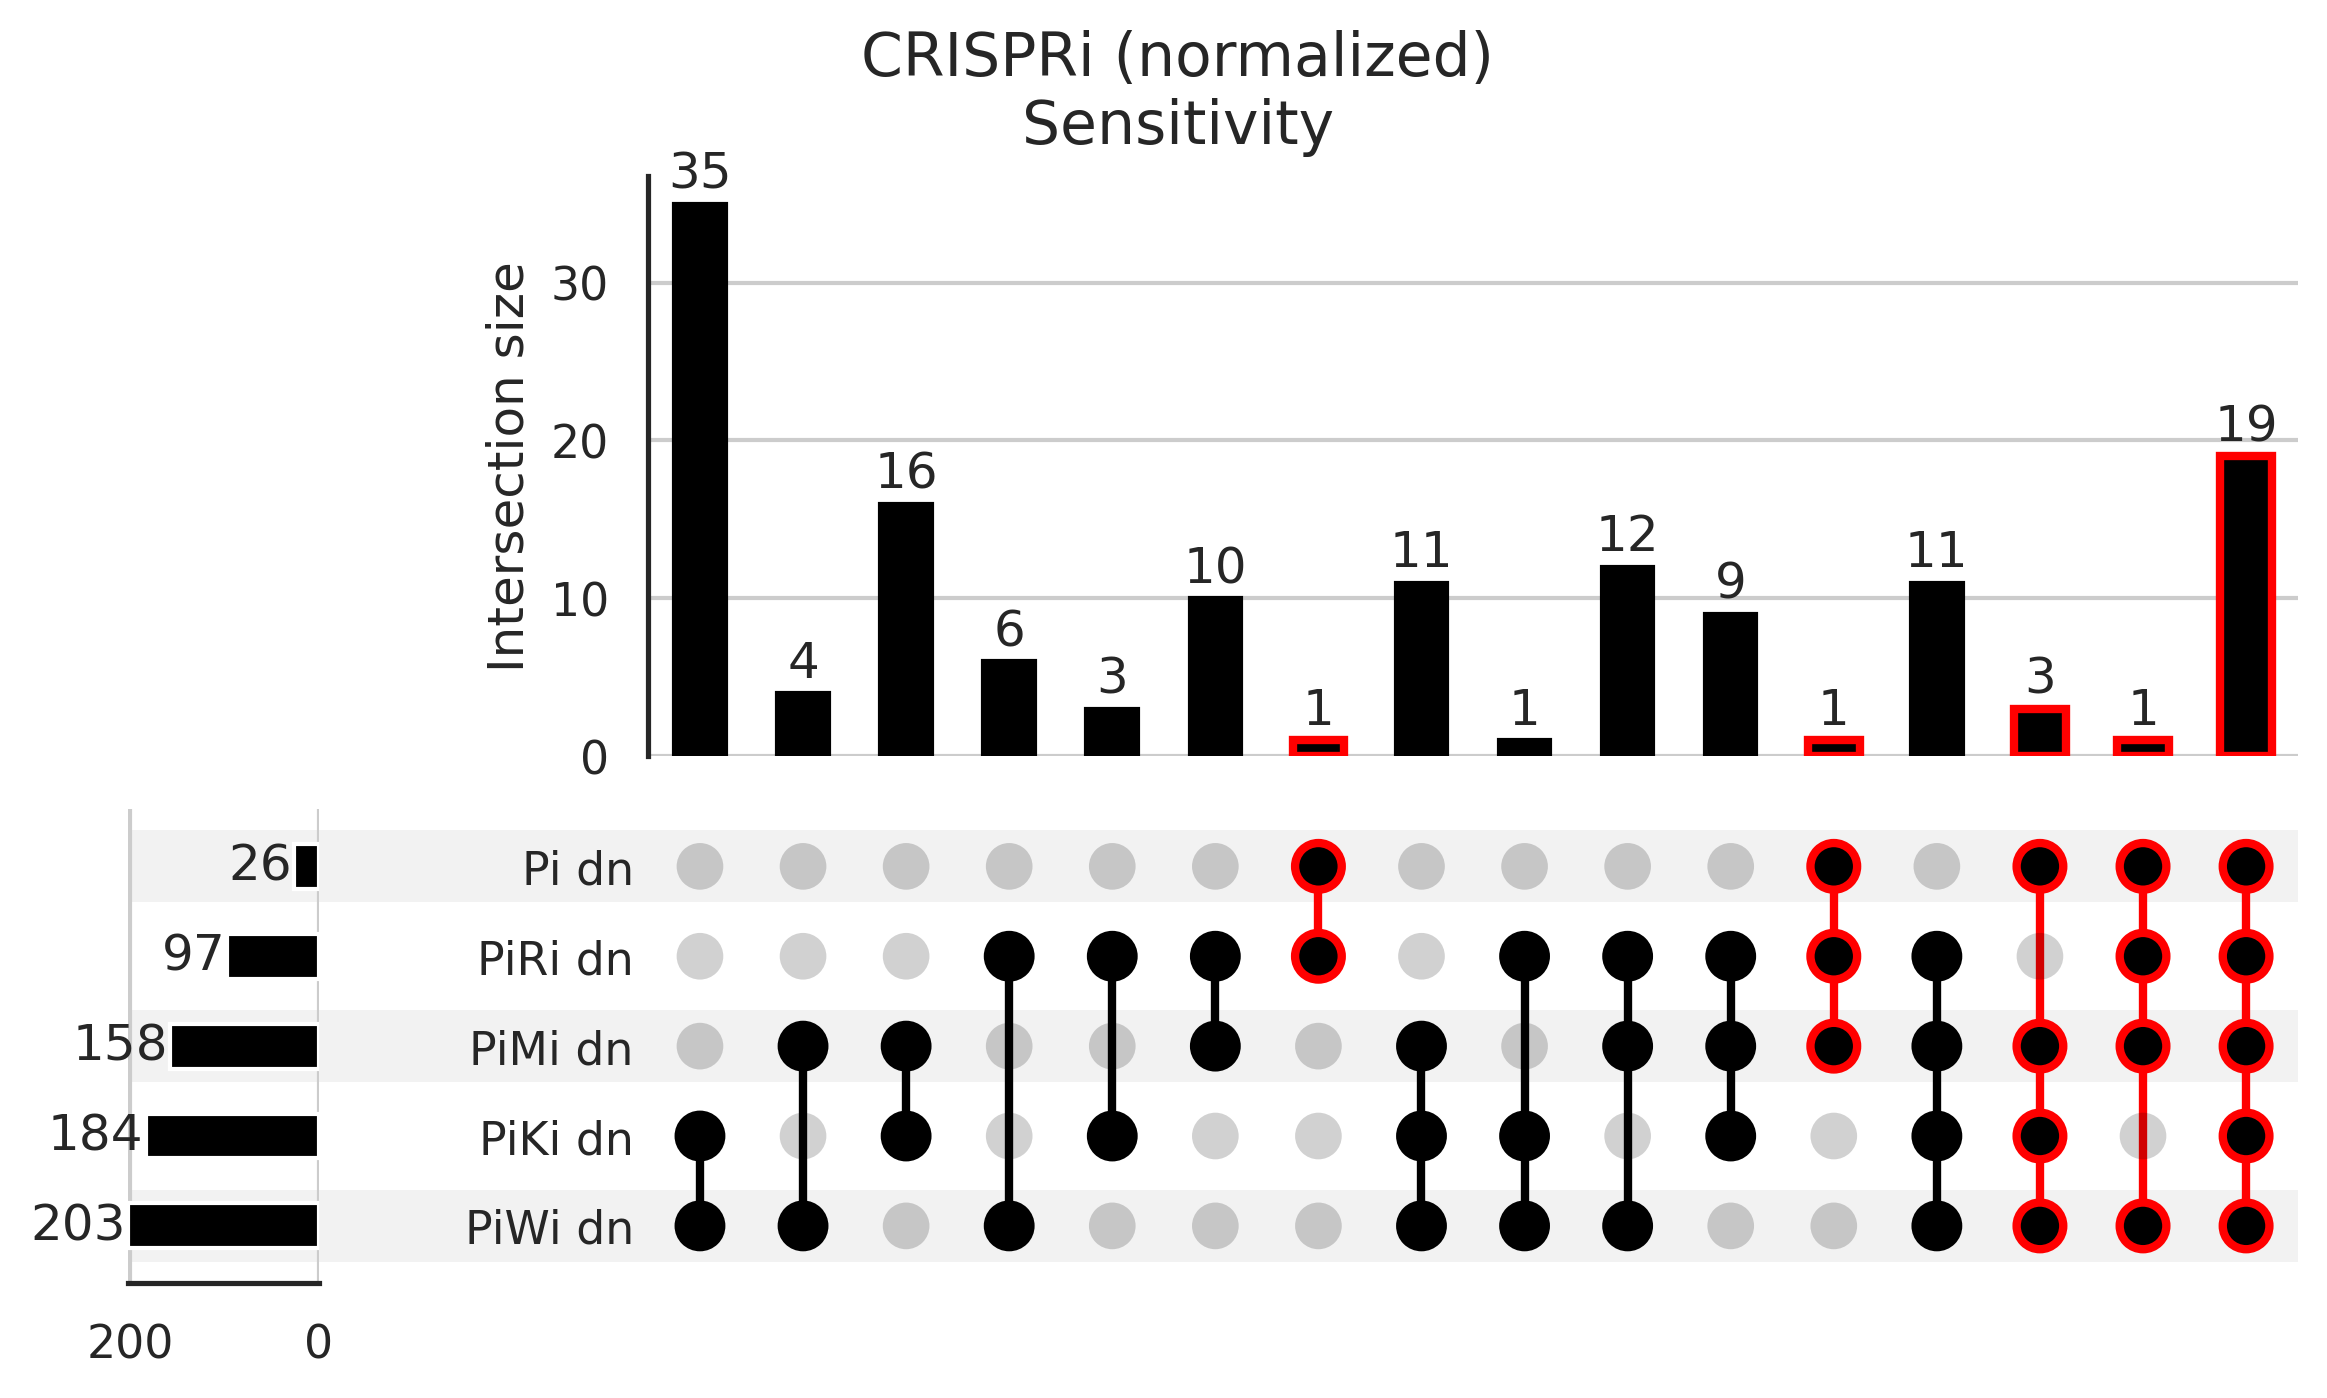

CPU times: user 406 ms, sys: 17.1 ms, total: 423 ms
Wall time: 420 ms


In [220]:
%%time 
UpSetData_Pi_up = from_contents(dict([(screen+' up',Ci_data[screen]['up']) for screen in Ci_data if 'Pi' in screen]))
UpSetData_Pi_dn = from_contents(dict([(screen+' dn',Ci_data[screen]['dn']) for screen in Ci_data if 'Pi' in screen]))

# Ci_make_two_upsetplot(UpSetData_Pi_up, UpSetData_Pi_dn,'rho_zscore_CRISPRi_Pi_upsetplot')
fig_u2 = plt.figure(figsize=(5, 5), dpi=300)
u2 = UpSet(
    UpSetData_Pi_dn, 
    subset_size='count',
#     orientation='vertiCil',
    show_counts='%d',
    min_degree=2
)

u2.style_subsets(
    present="Pi dn", 
    # absent="cat1", 
    edgecolor="red",
    linewidth=2
)

u2.plot(fig = fig_u2)

fig_u2.suptitle('CRISPRi (normalized)\nSensitivity')
plt.show()

In [221]:
query_dict = dict([(screen+' dn',Ci_data[screen]['dn']) for screen in Ci_data if 'Pi' in screen])

sensitivity_genes = reduce(set.intersection, (set(val) for val in query_dict.values()))

In [226]:
for i in sensitivity_genes:
    print(i)

RAD51D
H2AFX
PRDX1
SWI5
RNASEH2A
EME1
RAD54L
TRAIP
RAD51B
RNF8
XRCC2
RNASEH2B
PSMC3IP
RNASEH2C
DDX11
MND1
BRCA1
XRCC1
LIG1


CPU times: user 4.08 s, sys: 519 ms, total: 4.6 s
Wall time: 4.59 s


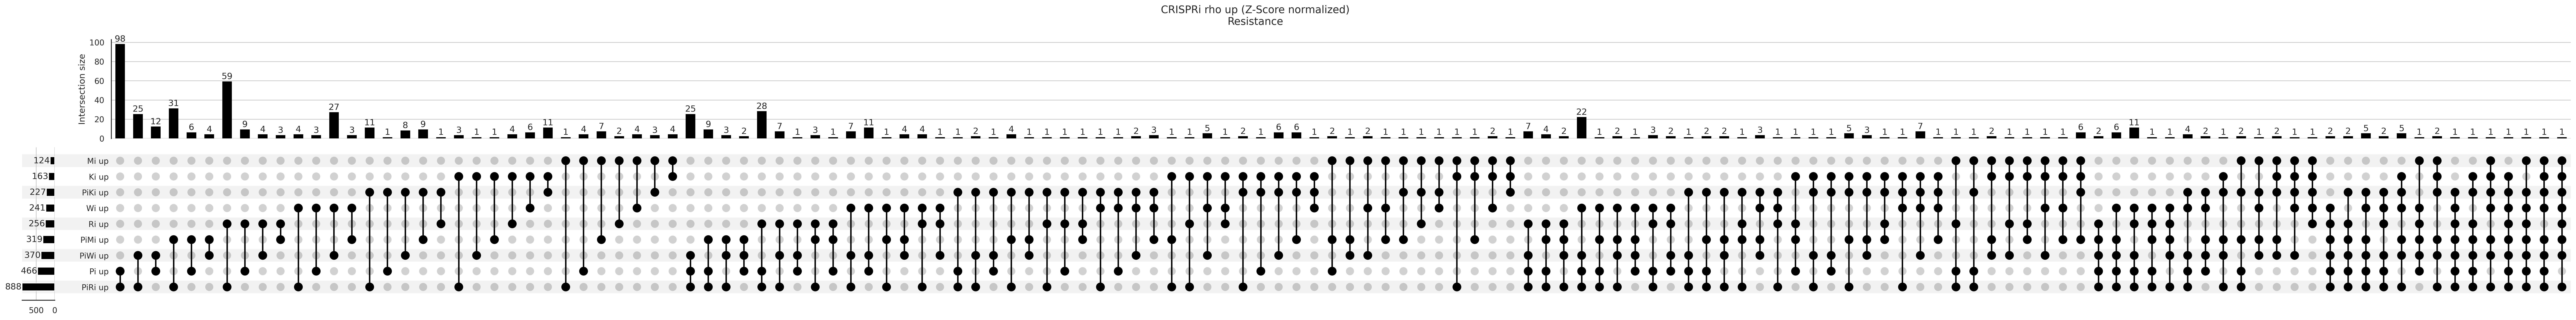

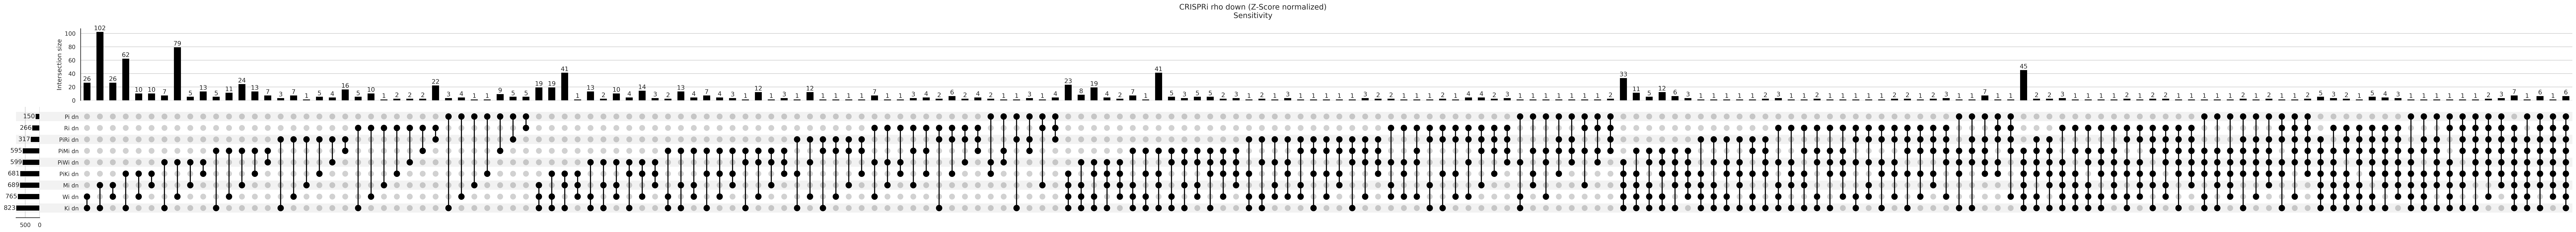

In [188]:
%%time 
UpSetData_all_up = from_contents(dict([(screen+' up',Ci_data[screen]['up']) for screen in Ci_data]))
UpSetData_all_dn = from_contents(dict([(screen+' dn',Ci_data[screen]['dn']) for screen in Ci_data]))

Ci_make_two_upsetplot(UpSetData_all_up, UpSetData_all_dn,'rho_zscore_CRISPRi_all_upsetplot')

In [191]:
from functools import reduce

query_dict = dict([(screen+' dn',Ci_data[screen]['dn']) for screen in Ci_data])

sensitivity_genes = reduce(set.intersection, (set(val) for val in query_dict.values()))

In [201]:
sensitivity_genes

{'CDK12', 'H2AFX', 'LIG1', 'PRDX1', 'RAD9A', 'RNF8'}

In [204]:
# Ci_df_rho_norm.loc[sensitivity_genes,]

#### Heatmap

In [91]:
# # plot 
# genes = ['PRDX1','BCL2','RNASEH2C']

# f = plt.figure(figsize=(13,2))

# g1 = sns.heatmap(
#     Ci_df_rho.loc[genes,:], 
# #     annot=True,
#     vmin=-10, vmax=10,
#     cmap="vlag",
# #     cbar=False,
# )

# g1.set_ylabel('')
# g1.set_xlabel('')
# g1.set_title('Actual rho scores')

# tl = g1.get_xticklabels()
# g1.set_xticklabels(tl, rotation=90)
# tly = g1.get_yticklabels()
# g1.set_yticklabels(tly, rotation=0)

# f.tight_layout()
# # plt.savefig('figures/rho_zscore1_heatmap.pdf')

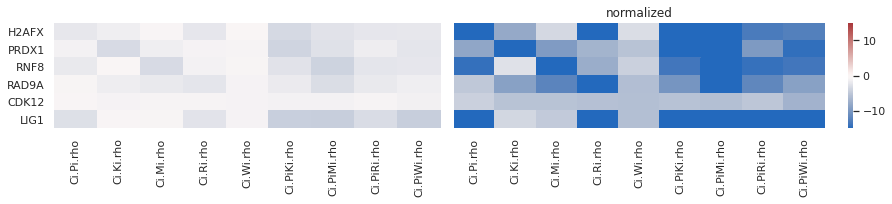

In [203]:
# plot 

f,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.12]}, figsize=(13,3))

ax1.get_shared_y_axes().join(ax1,ax2)

g1 = sns.heatmap(
    Ci_df_rho.loc[sensitivity_genes,:], 
#     annot=True,
    vmin=-15, vmax=15,
    cmap="vlag",
    cbar=False,
    ax=ax1
)

g1.set_ylabel('')
g1.set_xlabel('')
g1.set_title('')

g2 = sns.heatmap(
    Ci_df_rho_norm.loc[sensitivity_genes,:], 
#     annot=True,
    vmin=-15, vmax=15,
    cmap="vlag",
    ax=ax2
)

g2.set_ylabel('')
g2.set_xlabel('')
g2.set_title('normalized')
g2.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)


f.tight_layout()
plt.savefig('figures/rho_zscore_heatmap.pdf')

## Ca UpSet.plot

In [63]:
# %%time 
# UpSetData_up = from_contents(dict([(screen+' up',Ca_data[screen]['up']) for screen in Ca_data]))
# UpSetData_dn = from_contents(dict([(screen+' dn',Ca_data[screen]['dn']) for screen in Ca_data]))

# min_degree=2

# # The PDF document
# pdf_pages = PdfPages('figures/rho_zscore_CRISPRa_upsetplot.pdf')

    
# fig_u1 = plt.figure(figsize=(5, 5), dpi=300)
# fig_u2 = plt.figure(figsize=(5, 5), dpi=300)

# u1 = UpSet(
#     UpSetData_up, subset_size='count',
# #     orientation='vertical',
#     show_counts='%d',
#     min_degree=min_degree
# ).plot(fig = fig_u1)
# fig_u1.suptitle('CRISPRa rho up (Z-Score normalized)\nResistance')
# pdf_pages.savefig(fig_u1)

# u2 = UpSet(
#     UpSetData_dn, subset_size='count',
# #     orientation='vertical',
#     show_counts='%d',
#     min_degree=min_degree
# ).plot(fig = fig_u2)
# fig_u2.suptitle('CRISPRa rho down (Z-Score normalized)\nSensitivity')
# pdf_pages.savefig(fig_u2)

# # Write the PDF document to the disk
# pdf_pages.close()

## CRISPRa/i UpSet.plot

In [64]:
# %%time 
# tmp = {}
# for C,data in zip(['CRISPRa','CRISPRi'],[Ca_data,Ci_data]):
#     for screen in data:
#         tmp[screen+f' {C} Resistance'] = data[screen]['up']
#         tmp[screen+f' {C} Sensitivity']= data[screen]['dn']
# UpSetData = from_contents(tmp)
    
# fig = plt.figure(figsize=(5, 5), dpi=300)

# u = UpSet(
#     UpSetData, subset_size='count',
# #     orientation='vertical',
#     show_counts='%d',
#     min_degree=4
# ).plot(fig = fig)
# fig.suptitle('CRISPRa/i (Z-Score normalized rho)')
# plt.savefig('figures/rho_zscore_CRISPRai_upsetplot.pdf')

# Pathway analysis

In [31]:
# from iPAGE2 import ipage2

In [34]:
# ipage2.preprocess_db

In [33]:
# annotation_name = 'go_gene_sets_gs'
# annotation_gene_format = 'gs'
# de_gene_format = 'refseq'
# annotation_dir = 'direction/to/tmp_ipage'
# ipage2.run(
#     data['Ci.Ki.rho'].index.to_list() # de_genes
#     data['Ci.Ki.rho'].to_list() # de_profile
#     annotation_name, output_name='test', de_ft=de_gene_format, ann_ft=annotation_gene_format, annotation_dir=annotation_dir)

In [48]:
!mkdir CRISPRi_ipage

In [60]:
for screen in {c.split(".")[1] for c in data.columns}:
    data.loc[:,f'Ci.{screen}.rho'].to_csv(f'CRISPRi_ipage/{screen}.txt',sep='\t',header=False) 

In [ ]:
%%bash
export PAGEDIR='/data_gilbert/home/aarab/iPAGE'

cd CRISPRi_ipage
ls *.txt | parallel -j30 -k bash ~/Projects/Decitabine-treatment/ipage_loop.sh
cd ../

In [74]:
!date

Tue Nov 30 12:38:24 PST 2021
